# Analyse fréquentielle via la FFT

## Partie 1 - Charger et découper un signal acoustique

In [105]:
import numpy as np
import matplotlib.pyplot as plt ### ou encore from matplotlib import pyplot as plt
### permet de faire des zoom, des recadrages grâce à la souris : 
%matplotlib notebook
%matplotlib inline



import importlib
###  les fonctions de codage/décodage WAV : 
from scipy.io import wavfile as io
from IPython.display import Audio


from IPython.display import display, Math, Latex
from scipy.fftpack import fft, fftshift


In [106]:
Fe, data = io.read('Domine_quando_veneris_debut.wav')
print('Fréquence échantillonnage (Hz) : ' + str(Fe))



print('Dimensions dobjet : ' + str(np.shape(data)))
x = (data[:,0]+data[:,1])/2 ### conversion en mono

x=x/32000   ### sinon valeurs du signal trop grandes

begin_echan_signal1 = int(np.round(1.5 * Fe) - 1)
end_echan_signal1 = int(np.round(2.5 * Fe) - 1)
begin_echan_signal2 = int(np.round(6.5 * Fe) - 1)
end_echan_signal2 = int(np.round(7.5 * Fe) - 1)

signal1 = x[begin_echan_signal1:end_echan_signal1]
signal2 = x[begin_echan_signal2:end_echan_signal2]

N1= len(signal1)
N2= len(signal2)

PuissanceN1 = np.sum(np.square(signal1))/N1
PuissanceN2 = np.sum(np.square(signal2))/N2

print('Puissance signal 1 : ' + str(PuissanceN1))
print('Puissance signal 2 : ' + str(PuissanceN2))

Fréquence échantillonnage (Hz) : 44100
Dimensions dobjet : (1173276, 2)
Puissance signal 1 : 0.004260093045103459
Puissance signal 2 : 0.00672557639972851


Text(0, 0.5, 'Amplitude')

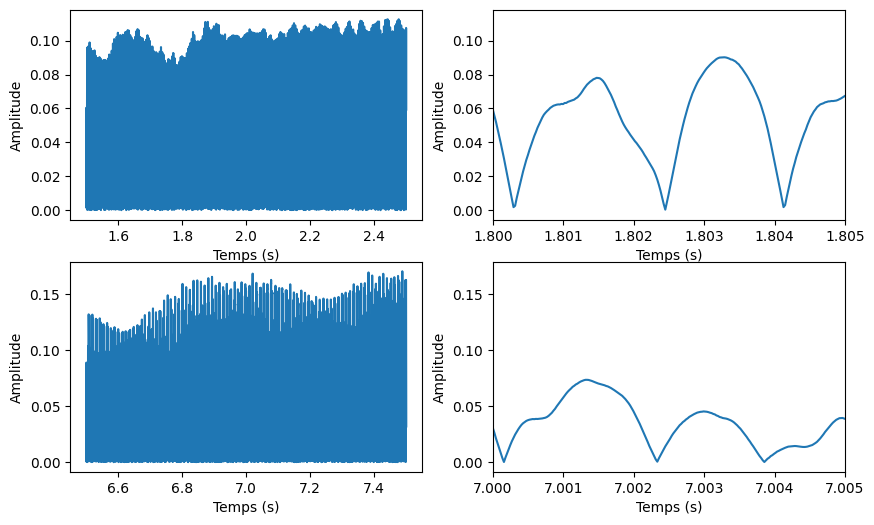

In [107]:
# graph 1 - signal 1
temps1=np.arange(1.5,2.5,1/Fe)

plt.figure(1,figsize=(10,6))
plt.subplot(221)
plt.plot(temps1,np.abs(signal1))
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.subplot(222)
plt.plot(temps1,np.abs(signal1))
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.xlim(1.8,1.805)

temps2=np.arange(6.5,7.5,1/Fe)

plt.subplot(223)
plt.plot(temps2,np.abs(signal2))
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.subplot(224)
plt.plot(temps2,np.abs(signal2))
plt.xlim(7,7.005)
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')


In [108]:
son_signal1 = Audio(signal1, rate=Fe)
son_signal2 = Audio(signal2, rate=Fe)
display(son_signal1)
display(son_signal2)

**Question 1.7 :**
<!-- epsace -->
On remarque que les deux parties sont stationnaires 
<br>

<br>
<br>
<br>
<br>


## Partie 2 - Dessiner un périodogramme

Text(0.5, 1.0, 'Périodogramme signal 1')

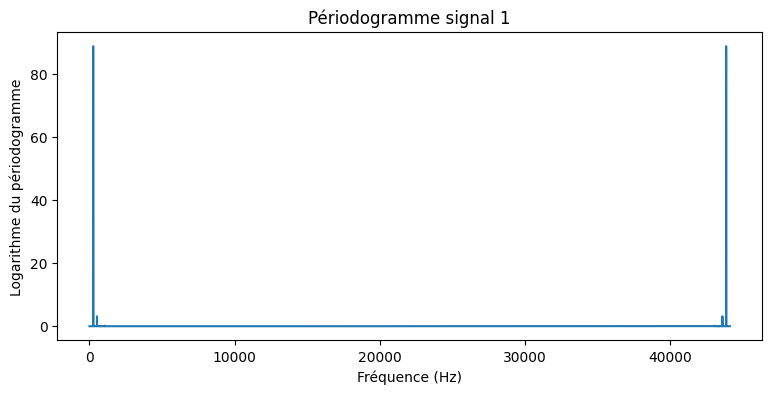

In [109]:
fft_signal1 = fft(signal1)
freq = np.arange(0,N1)/N1 # <=> freq = np.linspace(0,1,Fe)
I1 = np.abs(fft_signal1)**2/N1
freq_normalisee = (freq - np.min(freq)) / (np.max(freq) - np.min(freq))

plt.figure(2,figsize=(20,4))
plt.subplot(121)
plt.plot(freq*Fe, I1)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Logarithme du périodogramme')
plt.title('Périodogramme signal 1')

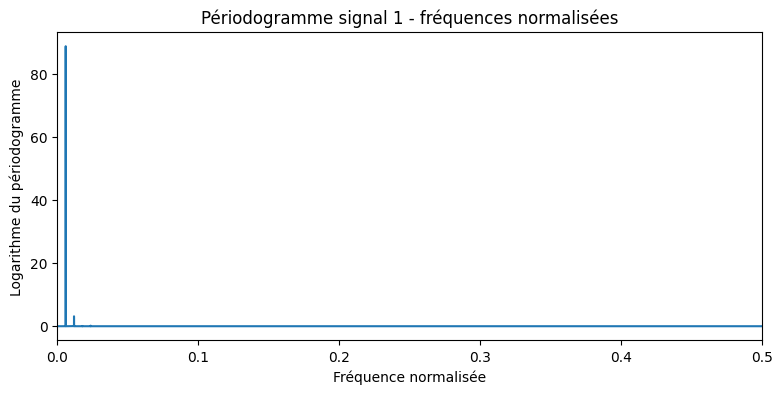

In [110]:
plt.figure(3,figsize=(20,4))
plt.subplot(121)
plt.plot(freq_normalisee, I1)
plt.xlim(0, 0.5)
plt.xlabel('Fréquence normalisée')
plt.ylabel('Logarithme du périodogramme')
plt.title('Périodogramme signal 1 - fréquences normalisées')
plt.show()

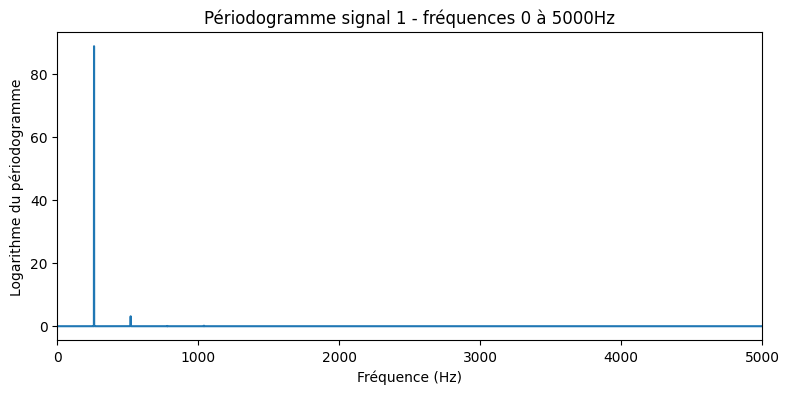

In [111]:
plt.figure(4,figsize=(20,4))
plt.subplot(121)
plt.plot(freq*Fe, I1)
plt.xlim(0, 5000)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Logarithme du périodogramme')
plt.title('Périodogramme signal 1 - fréquences 0 à 5000Hz')
plt.show()

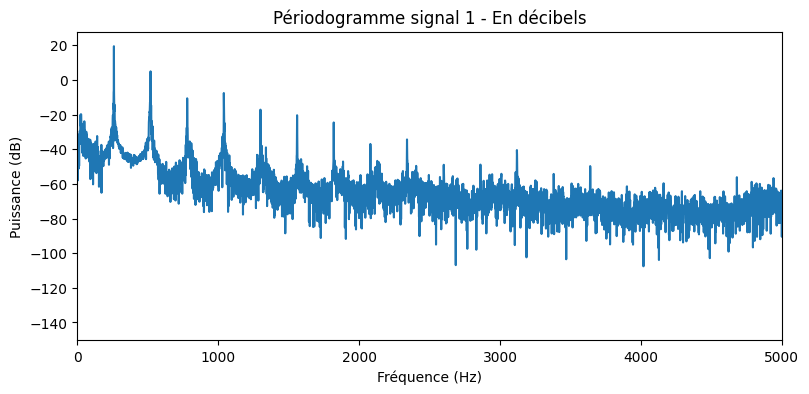

In [112]:

plt.figure(5,figsize=(20,4))

I1 = 10*np.log10(I1)

plt.subplot(122)
plt.plot(freq*Fe, I1)
plt.xlim(0, 5000)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Puissance (dB)')
plt.title('Périodogramme signal 1 - En décibels')
plt.show()

**Définition de la fonction periodo**
- Prend en paramètre : un signal, la fréquence d'échantillonage, Fmin et Fmax
- Renvoie : un périodogramme en décibels, les fréquences associées

In [113]:
def periodo(signal, Fe, fmin, fmax):
    N = len(signal)
    fft_signal = fft(signal)
    freq = np.arange(0,N)/N
    mask = (freq >= fmin) & (freq <= fmax)
    I2 = np.abs(fft_signal) ** 2 / N
    I2 = np.log10(I2)
    return freq[mask], I2[mask]

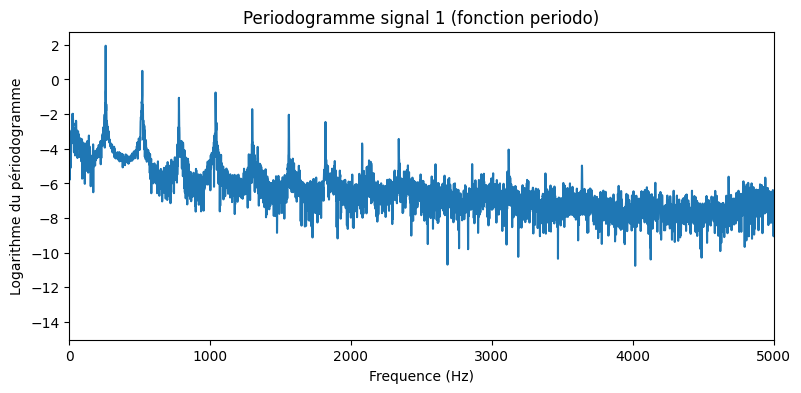

In [114]:
# TEST FONCTION PERIODO
fmin = 0
fmax = 5000
freq2, I2 = periodo(signal1, Fe, fmin, fmax)
plt.figure(6,figsize=(20,4))
plt.subplot(121)
plt.plot(freq2*Fe, I2)
plt.xlim(fmin, fmax)
plt.xlabel('Frequence (Hz)')
plt.ylabel('Logarithme du périodogramme')
plt.title('Periodogramme signal 1 (fonction periodo)')
plt.show()

<br>
<br>
<br>
<br>

## Partie 3 - Interpréter un périodogramme

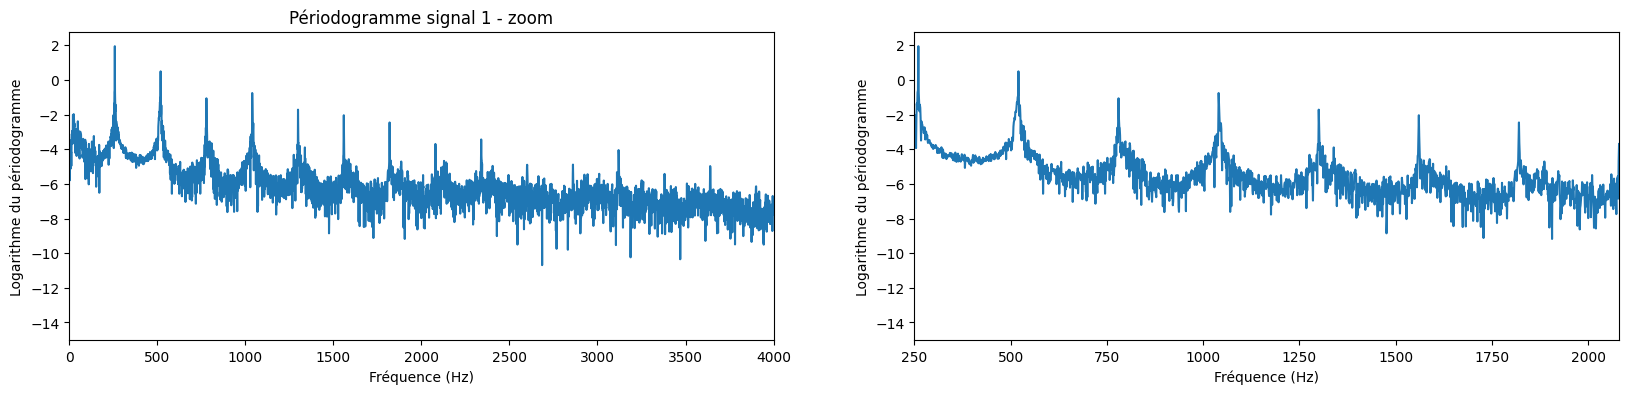

In [115]:
fft_signal1 = fft(signal1)
freq = np.linspace(0,1,Fe)
I1 = np.abs(fft_signal1)**2/N1

plt.figure(4,figsize=(20,4))
plt.subplot(121)
plt.plot(freq*Fe, np.log10(I1))
plt.xlim(0, 4000)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Logarithme du périodogramme')
plt.title('Périodogramme signal 1 - zoom')
plt.subplot(122)
plt.plot(freq*Fe, np.log10(I1))
plt.xlim(250, 2080)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Logarithme du périodogramme')
plt.show()

**Question 3.1 :**
<!-- epsace -->
On observe une périodicité, les pics se répètent de manière régulière.
<br>
L'utilisation du logarithme et du zoom nous a permis de mieux distinguer les pics et la périodicité.
<br>
Cette périodicité peut nous indiquer la présence d'une note de musique unique. 

**Question 3.2 :**
<!-- epsace -->
Les agrandissements ont déjà effectué de manière a isoler un nombre précis de pics. 
<br>
On observe 7 pics, de 250 à 2080 donc :

| f1 | 2f1 | 3f1 | 4f1 | 5f1 | 6f1 | 7f1 |
|----|-----|-----|-----|-----|-----|-----|
| 255 | 510 | 770 | 1020 | 1275 | 1530 | 1785 |

(2080 - 255) / 7 ~= 260Hz

<br>
Nous avons donc un pic à 260, puis 510 (260+260), puis 770...
Nous avons un pic tous les 260Hz, donc `{f1, 2f1, 2f1,...}`

**Question 3.3 :**
<!-- epsace -->
L'harmonique la plus haute est situé à 260Hz, c'est la ou l'impultion est la plus forte, nous pouvons donc en déduire que c'est la fondamentale.

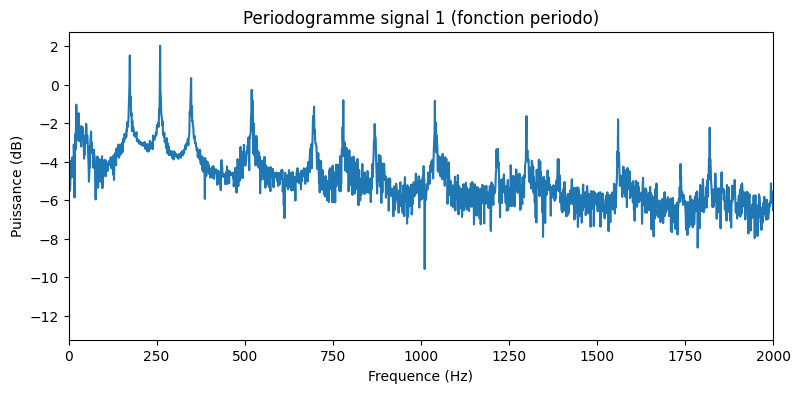

In [116]:
fmin = 0
fmax = 2000
freq3, I3 = periodo(signal2, Fe, fmin, fmax)
plt.figure(6,figsize=(20,4))
plt.subplot(121)
plt.plot(freq3*Fe, I3)
plt.xlim(fmin, fmax)
plt.xlabel('Frequence (Hz)')
plt.ylabel('Puissance (dB)')
plt.title('Periodogramme signal 1 (fonction periodo)')
plt.show()

**Question 3.4 :**
<!-- epsace -->
On observe la même périodicité que le signal 1 à l'exception de l'ajout d'une nouvelle note car on distingue de nouveaux pics qui se répètent mais a une périodicité différente. On retrouve cette même note entre f2 et f3, respectivement situées entre environ 260 et 180. (le soignal 2 est composé de 2 signal, dont le 1er)

| f1 | f2 | f3 | f4 | f5 | f6 | f7 | f8 |
|----|----|----|----|----|----|----|----|
| 260 | 438 | 520 | 697 | 780 | 870 | 1040 | 1170 |
<!-- 260, 438, 520, 697, 780, 870, 1040 -->

En faisant le rapport de f3/f2 on obtient 3/2, c'est donc un quinte

Pour trouver le demi-ton, on applique la formule `N = 12 * log2(f2/f3)`.
<br>

**Question 3.5 :**
Le signal 2 est composé de 2 signals, de deux périodes différentes, avec les valeurs trouver nous pouvons affirmer que `{f2, 2f2, 3f2,...} U {f3, 2f3, 3f3, ...}`

In [117]:
Nton = 12 * np.log2(260/180)
print('Il y a environ ' + str(int(Nton)) + ' demi-ton entre f1 et f2.')

Il y a environ 6 demi-ton entre f1 et f2.


<br>
<br>
<br>
<br>

## 4. Travail personnel

fréquence échantillonnage (Hz)= 44100
Dimensions dobjet : (310116, 2)


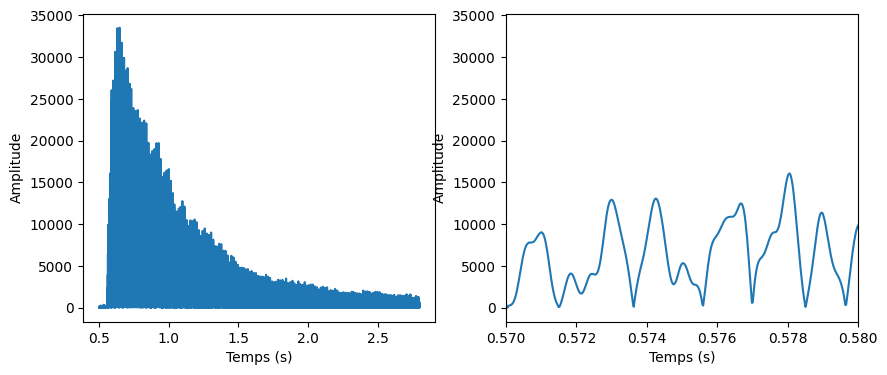

In [118]:
Fe2, data2 = io.read('do_mi.wav')
print('fréquence échantillonnage (Hz)= ' + str(Fe2))

borne_temps_start3 = 0.5
borne_temps_end3 = 2.8

print('Dimensions dobjet : ' + str(np.shape(data2)))
x2 = (data2[:,0]+data2[:,1]) / 2 ### conversion en mono

x2=x2/32000   ### sinon valeurs du signal trop grandes

begin_echan_signal3 = int(np.round(borne_temps_start3 * Fe2) - 1)
end_echan_signal3 = int(np.round(borne_temps_end3 * Fe2) - 1)

signal3 = x2[begin_echan_signal3:end_echan_signal3]

N3= len(signal3)

PuissanceN3 = np.sum(np.square(signal3))/N3

temps3=np.arange(borne_temps_start3,borne_temps_end3,1/Fe2)

plt.figure(9,figsize=(10,4))
plt.subplot(121)
plt.plot(temps3,np.abs(signal3))
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.subplot(122)
plt.plot(temps3,np.abs(signal3))
plt.xlabel('Temps (s)')
plt.ylabel('Amplitude')
plt.xlim(.57,.58)
plt.show()

son_signal3 = Audio(signal3, rate=Fe2)
display(son_signal3)

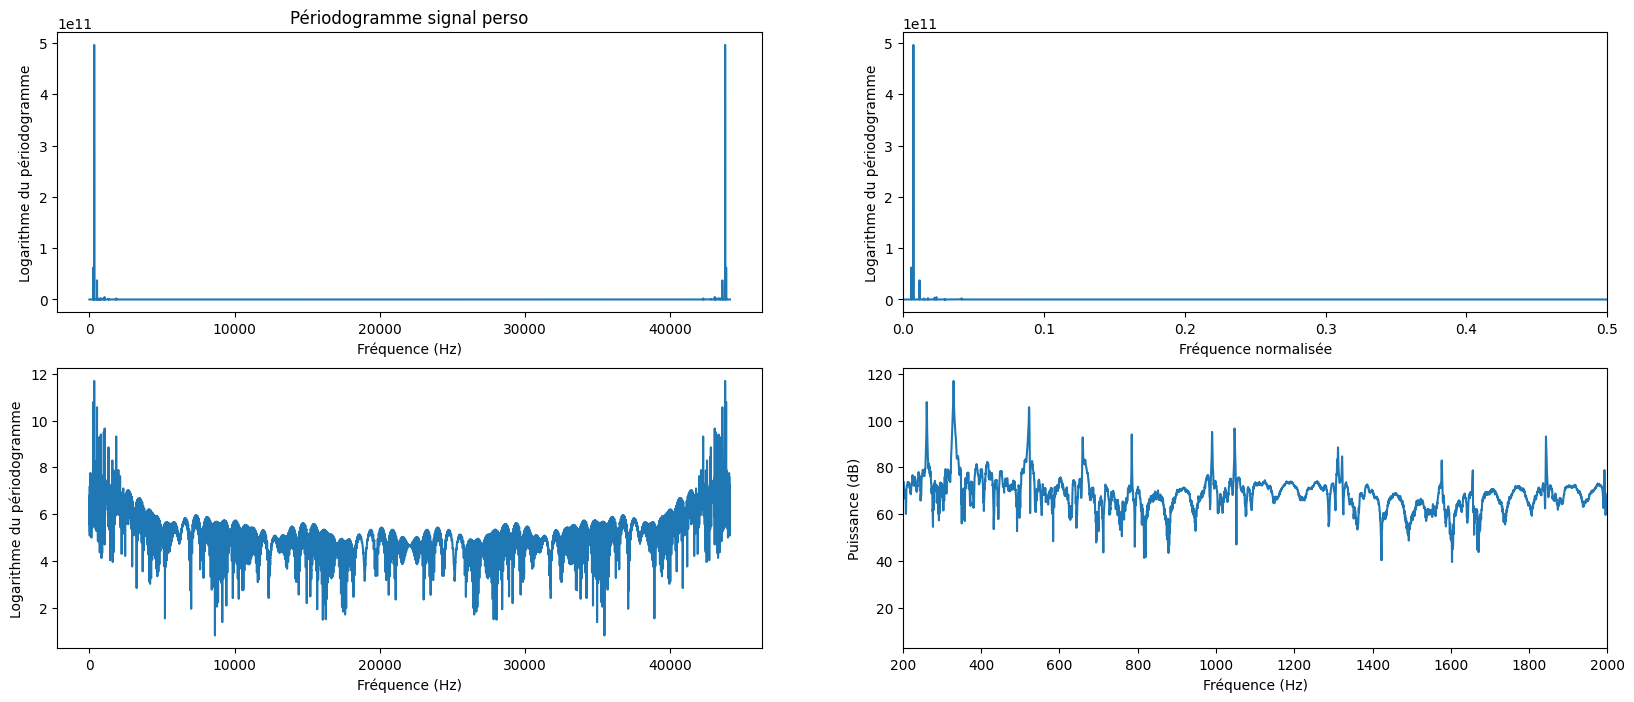

In [119]:

fft_signal3 = fft(signal3)
freq3=np.arange(0,N3)/N3
I3 = np.abs(fft_signal3) ** 2 / N3
freq_normalisee3 = (freq3 - np.min(freq3)) / (np.max(freq3) - np.min(freq3))

plt.figure(10,figsize=(20,8))
plt.subplot(221)
plt.plot(freq3*Fe2, I3)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Logarithme du périodogramme')
plt.title('Périodogramme signal perso')

plt.subplot(222)
plt.plot(freq_normalisee3, I3)
plt.xlim(0, 0.5)
plt.xlabel('Fréquence normalisée')
plt.ylabel('Logarithme du périodogramme')

plt.subplot(223)
plt.plot(freq3*Fe2, np.log10(I3))
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Logarithme du périodogramme')

I4 = 10*np.log10(I3)

plt.subplot(224)
plt.plot(freq3*Fe2, I4)
plt.xlim(200,2000)
plt.xlabel('Fréquence (Hz)')
plt.ylabel('Puissance (dB)')
plt.show()

# Hypothèse et discussion

Graphiquement on déduit que la fréquence fondamentale est 250Hz.
Nous observons également un pic à 320Hz.

Nous pouvons donc en déduire que le signal est composé de deux notes.
Or, 260Hz correspond (environ) à un do, et 320Hz correspond (environ) à un mi.

Nous pouvons donc en déduire que le signal est composé d'un do et d'un mi. Les pics suivant sont des harmoniques de ces deux notes.

D'après internet et nos resulats nous pouvons en déduire ces tableaux de fréquences :

## Tableau des fréquences du mi
| f1 | f2 | f3 | f4 | f5 | f6 | f7 | f8 |
|----|----|----|----|----|----|----|----|
| 260 | 438 | 520 | 697 | 780 | 870 | 1040 | 1170 |

## Tableau des fréquences du do
| f1 | f2 | f3 | f4 | f5 | f6 | f7 | f8 |
|----|----|----|----|----|----|----|----|
| 320 | 640 | 960 | 1280 | 1600 | 1920 | 2240 | 2560 |